In [ ]:
datapath = "/content/drive/MyDrive/Colab Notebooks/train.csv"

In [ ]:
import pandas as pd
dataset = pd.read_csv(datapath)

In [ ]:
dataset

,id,statement,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
127652,aac4b9af642e5e4d,We'll see about that.,0,0,0,0,0,0
127653,aac4d0cff5e12031,"""\n Speedy deletion of """"27 Tricor Ave. New Pa...",0,0,0,0,0,0
127654,aac4dc3102e5eaad,"""\n\nThe additions I made were 100% factual. I...",1,0,0,0,1,1
127655,aac5fc3b2eb2a65f,"Nathan, we have been through this a thousand t...",0,0,0,0,0,0


In [ ]:
dataset.columns = ['User ID','Text','Toxic','Severe_toxic','Obscene','Threat','Insult','Identity_hate']

In [ ]:
dataset

,User ID,Text,Toxic,Severe_toxic,Obscene,Threat,Insult,Identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
127652,aac4b9af642e5e4d,We'll see about that.,0,0,0,0,0,0
127653,aac4d0cff5e12031,"""\n Speedy deletion of """"27 Tricor Ave. New Pa...",0,0,0,0,0,0
127654,aac4dc3102e5eaad,"""\n\nThe additions I made were 100% factual. I...",1,0,0,0,1,1
127655,aac5fc3b2eb2a65f,"Nathan, we have been through this a thousand t...",0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0019678d90>,
      dtype=object)

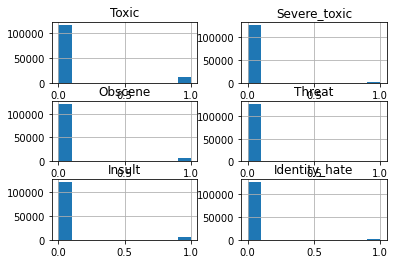

In [ ]:
dataset.hist()

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset = dataset.drop(['User ID'],axis=1)

In [ ]:
from nltk.corpus import stopwords
import re

stopwords = set(stopwords.words('english'))
def filter2(text):
    return re.sub("[!,*)@#%(&$_?.^+]"," ",text)

def filter_stopwords(Text):
    #this is known as list comprehension it is a short-cut which can be used instead of a for loop
    return " ".join([word for word in Text.split() if word not in stopwords])

In [ ]:
dataset["new_text"] = dataset["Text"].apply(filter2)
dataset["new_text"] = dataset["new_text"].apply(filter_stopwords)

In [ ]:
dataset = dataset.drop(['Text'],axis=1)

In [ ]:
dataset['Toxic_Severe_Obscene_Insult_Threat_Identity hate'] = dataset['Toxic'].astype(str)+"_"+dataset['Severe_toxic'].astype(str)+"_"+dataset['Obscene'].astype(str)+"_"+dataset['Threat'].astype(str)+"_"+dataset['Insult'].astype(str)+"_"+dataset['Identity_hate'].astype(str)

In [36]:
dataset.to_csv

<bound method NDFrame.to_csv of                                                  new_text     negative  \
0       Explanation Why edits made username Hardcore M...  0_0_0_0_0_0   
1       D'aww He matches background colour I'm seeming...  0_0_0_0_0_0   
2       Hey man I'm really trying edit war It's guy co...  0_0_0_0_0_0   
3       " More I can't make real suggestions improveme...  0_0_0_0_0_0   
4            You sir hero Any chance remember page that's  0_0_0_0_0_0   
...                                                   ...          ...   
127652                                          We'll see  0_0_0_0_0_0   
127653  " Speedy deletion ""27 Tricor Ave New Paltz NY...  0_0_0_0_0_0   
127654  " The additions I made 100 factual It's appare...  1_0_0_0_1_1   
127655  Nathan thousand times seems let try explain Th...  0_0_0_0_0_0   
127656  March 2007 UTC Is Image:Marist high school Ore...  0_0_0_0_0_0   

       Toxic_Severe_Obscene_Insult_Threat_Identity hate  
0                    

In [ ]:
dataset = dataset.drop(['Toxic','Severe_toxic','Obscene','Insult','Threat','Identity_hate'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset['new_text'].values.reshape(-1,1),dataset['Toxic_Severe_Obscene_Insult_Threat_Identity hate'].values.reshape(-1,1),test_size=0.3,random_state=7)
print("Length of train_data",len(x_train))
print("Length of test_data",len(x_test))

Length of train_data 89359
Length of test_data 38298


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
td=TfidfVectorizer()
X_train = td.fit_transform(x_train.ravel())
X_test = td.transform(x_test.ravel())

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(max_iter=10000000)

model_1 = model_1.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y_predicted = model_1.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.9167058332027782

In [35]:
from sklearn.metrics import accuracy_score #gives number of correct predictions
accuracy_score(y_test, y_predicted, normalize = False )

35108